In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
raw_train = pd.read_csv('data/train.csv')
raw_test = pd.read_csv('data/test.csv')

In [4]:
display(raw_train.head())
display(raw_train.info())
display(raw_train.describe())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


None

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
train_x = pd.DataFrame()
train_y = raw_train['Transported']

test_x = pd.DataFrame()

ohe_planets = OneHotEncoder(drop='first')
planets_train = ohe_planets.fit_transform(raw_train['HomePlanet'].factorize()[0].reshape(-1, 1)).toarray()
train_x['HomePlanet_1'] = planets_train[:,0]
train_x['HomePlanet_2'] = planets_train[:,1]
train_x['HomePlanet_3'] = planets_train[:,2]

planets_test = ohe_planets.transform(raw_test['HomePlanet'].factorize()[0].reshape(-1, 1)).toarray()
test_x['HomePlanet_1'] = planets_test[:,0]
test_x['HomePlanet_2'] = planets_test[:,1]
test_x['HomePlanet_3'] = planets_test[:,2]



In [90]:
train_x['CryoSleep'] = raw_train['CryoSleep']
train_x['CryoSleep'] = train_x['CryoSleep'].fillna(False)

test_x['CryoSleep'] = raw_test['CryoSleep']
test_x['CryoSleep'] = test_x['CryoSleep'].fillna(False)

In [91]:
cabin_splits = raw_train['Cabin'].str.strip().str.split('/')
cabin = pd.DataFrame()
cabin['Cabin_First_Letter'] = cabin_splits.str[0]
cabin['Cabin_Number'] = cabin_splits.str[1]
cabin['Cabin_Second_Letter'] = cabin_splits.str[2]

ohe_cabins = OneHotEncoder(drop='first')
cabins_train = ohe_cabins.fit_transform(cabin['Cabin_First_Letter'].factorize()[0].reshape(-1, 1)).toarray()
train_x['Cabin_First_Letter_1'] = cabins_train[:,0]
train_x['Cabin_First_Letter_2'] = cabins_train[:,1]
train_x['Cabin_First_Letter_3'] = cabins_train[:,2]
train_x['Cabin_First_Letter_4'] = cabins_train[:,3]
train_x['Cabin_First_Letter_5'] = cabins_train[:,4]
train_x['Cabin_First_Letter_6'] = cabins_train[:,5]
train_x['Cabin_First_Letter_7'] = cabins_train[:,6]
train_x['Cabin_First_Letter_8'] = cabins_train[:,7]


test_cabin_splits = raw_test['Cabin'].str.strip().str.split('/')
test_cabin = pd.DataFrame()
test_cabin['Cabin_First_Letter'] = test_cabin_splits.str[0]
test_cabin['Cabin_Number'] = test_cabin_splits.str[1]
test_cabin['Cabin_Second_Letter'] = test_cabin_splits.str[2]

cabins_test = ohe_cabins.transform(test_cabin['Cabin_First_Letter'].factorize()[0].reshape(-1, 1)).toarray()
test_x['Cabin_First_Letter_1'] = cabins_test[:,0]
test_x['Cabin_First_Letter_2'] = cabins_test[:,1]
test_x['Cabin_First_Letter_3'] = cabins_test[:,2]
test_x['Cabin_First_Letter_4'] = cabins_test[:,3]
test_x['Cabin_First_Letter_5'] = cabins_test[:,4]
test_x['Cabin_First_Letter_6'] = cabins_test[:,5]
test_x['Cabin_First_Letter_7'] = cabins_test[:,6]
test_x['Cabin_First_Letter_8'] = cabins_test[:,7]

train_x['Cabin_Number'] = cabin['Cabin_Number']
test_x['Cabin_Number'] = test_cabin['Cabin_Number']

ohe_cabins_2 = OneHotEncoder(drop='first')
cabins_2_train = ohe_cabins_2.fit_transform(cabin['Cabin_Second_Letter'].factorize()[0].reshape(-1, 1)).toarray()
train_x['Cabin_Second_Letter_1'] = cabins_2_train[:,0]
train_x['Cabin_Second_Letter_2'] = cabins_2_train[:,1]

cabins_2_test = ohe_cabins_2.fit_transform(test_cabin['Cabin_Second_Letter'].factorize()[0].reshape(-1, 1)).toarray()
test_x['Cabin_Second_Letter_1'] = cabins_2_test[:,0]
test_x['Cabin_Second_Letter_2'] = cabins_2_test[:,1]

train_x

,HomePlanet_1,HomePlanet_2,HomePlanet_3,CryoSleep,Cabin_First_Letter_1,Cabin_First_Letter_2,Cabin_First_Letter_3,Cabin_First_Letter_4,Cabin_First_Letter_5,Cabin_First_Letter_6,...,Destination_1,Destination_2,Destination_3,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.0,0.0,0.0,False,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,False,39.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,False,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,False,24.0,109.0,9.0,25.0,549.0,44.0
2,1.0,0.0,0.0,False,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,True,58.0,43.0,3576.0,0.0,6715.0,49.0
3,1.0,0.0,0.0,False,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,False,33.0,0.0,1283.0,371.0,3329.0,193.0
4,0.0,1.0,0.0,False,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,False,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,0.0,False,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,True,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,0.0,1.0,0.0,True,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,False,18.0,0.0,0.0,0.0,0.0,0.0
8690,0.0,1.0,0.0,False,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,False,26.0,0.0,0.0,1872.0,1.0,0.0
8691,1.0,0.0,0.0,False,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,False,32.0,0.0,1049.0,0.0,353.0,3235.0


In [92]:
ohe_destinations = OneHotEncoder(drop='first')
destinations_train = ohe_destinations.fit_transform(raw_train['Destination'].factorize()[0].reshape(-1, 1)).toarray()
train_x['Destination_1'] = destinations_train[:,0]
train_x['Destination_2'] = destinations_train[:,1]
train_x['Destination_3'] = destinations_train[:,2]

destinations_test = ohe_destinations.fit_transform(raw_test['Destination'].factorize()[0].reshape(-1, 1)).toarray()
test_x['Destination_1'] = destinations_test[:,0]
test_x['Destination_2'] = destinations_test[:,1]
test_x['Destination_3'] = destinations_test[:,2]

In [93]:
train_x['Age'] = raw_train['Age']
test_x['Age'] = raw_test['Age']

train_x['VIP'] = raw_train['VIP']
train_x['VIP'] = train_x['VIP'].fillna(False)

test_x['VIP'] = raw_test['VIP']
test_x['VIP'] = test_x['VIP'].fillna(False)

train_x['RoomService'] = raw_train['RoomService']
test_x['RoomService'] = raw_test['RoomService']

train_x['FoodCourt'] = raw_train['FoodCourt']
test_x['FoodCourt'] = raw_test['FoodCourt']

train_x['ShoppingMall'] = raw_train['ShoppingMall']
test_x['ShoppingMall'] = raw_test['ShoppingMall']

train_x['Spa'] = raw_train['Spa']
test_x['Spa'] = raw_test['Spa']

train_x['VRDeck'] = raw_train['VRDeck']
test_x['VRDeck'] = raw_test['VRDeck']

In [94]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [95]:
imp = IterativeImputer()
imp.fit(train_x)

columns = train_x.columns
train_data = pd.DataFrame(imp.transform(train_x), columns=columns)
test_data = pd.DataFrame(imp.transform(test_x), columns=columns)



In [96]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

<AxesSubplot:>

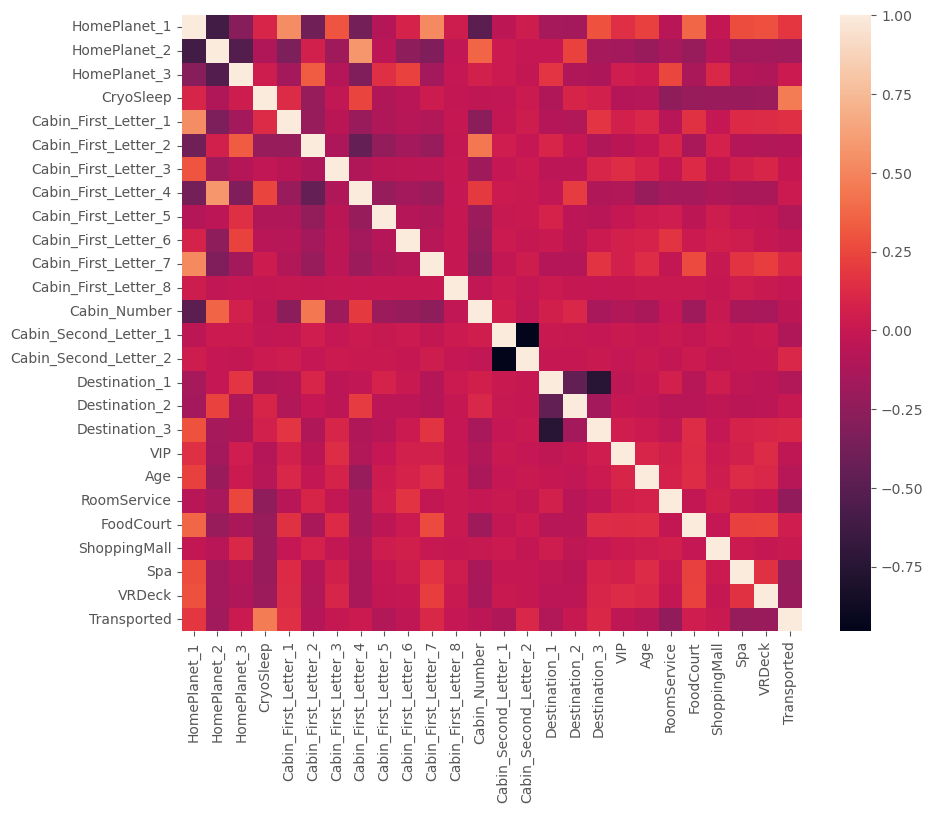

In [100]:
fig = plt.figure(figsize=(10,8))
temp = train_data
temp['Transported'] = raw_train['Transported']
sns.heatmap(data=temp.corr())

In [112]:
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [116]:
train_data = train_data.drop(columns='Transported')

In [117]:
param_grid = dict()

pipe = Pipeline( [('scaler', StandardScaler()), 
                  ('gridsearch', GridSearchCV(LogisticRegression(), param_grid, cv=10))] )
pipe.fit(train_data, train_y)
est = pipe['gridsearch'].best_estimator_
print(pipe['gridsearch'].best_score_)


0.79121741200746


In [124]:
results = pipe['gridsearch'].predict(test_data)
submission = pd.DataFrame()
submission['PassengerId'] = raw_test['PassengerId']
submission['Transported'] = results
submission.to_csv('data/submission.csv', index=False)

C:\Users\628739\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [126]:
import xgboost as xgb

C:\Users\628739\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [128]:
param_grid = dict()

pipe = Pipeline( [('scaler', StandardScaler()), 
                  ('gridsearch', GridSearchCV(xgb.XGBClassifier(), param_grid, cv=10))] )
pipe.fit(train_data, train_y)
est = pipe['gridsearch'].best_estimator_
print(pipe['gridsearch'].best_score_)

C:\Users\628739\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\628739\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:50:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\628739\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\628739\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\628739\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:50:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\628739\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\628739\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:50:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\628739\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\628739\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\628739\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:50:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\628739\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7685549515230876
